In [1]:
#Libraries needed to implement and simulate quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, qasm2, qasm3
from qiskit_aer import Aer
from qiskit.primitives import BackendSampler
#Custem functions to simplify answers
import Our_Qiskit_Functions as oq #a part of the libabry presented in arXiv:1903.04359v1.

import numpy as np
import math as m

#Initialize backends simulators to visualize circuits
S_simulator = Aer.backends(name='statevector_simulator')[0]
Q_simulator = Aer.backends(name='qasm_simulator')[0]

In [2]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
super0 = QuantumCircuit(q, c)

super0.h(q[0])
super0.id(q[1])
super0.id(q[2])

super0.measure(q[0], c[0])

#print(super0.qasm3())
print(qasm3.dumps(super0))

OPENQASM 3.0;
include "stdgates.inc";
bit[3] c0;
qubit[3] q1;
h q1[0];
id q1[1];
id q1[2];
c0[0] = measure q1[0];



In [3]:
q = QuantumRegister(1, name='q')
c = ClassicalRegister(1, name='c')
super0 = QuantumCircuit(q, c,name='qc')

super0.h(q[0])

#Inst = super0.qasm()
Inst = qasm2.dumps(super0)

print(Inst[36:len(Inst)])

qreg q[1];
creg c[1];
h q[0];


In [4]:
q = QuantumRegister(2, name='q')
c = ClassicalRegister(2, name='c')
two_q = QuantumCircuit(q, c,name='qc')

two_q.h(q[0])
two_q.h(q[1])
two_q.measure(q[0],c[0])

print('____________QuantumCircuit.qasm()_____________________')
qasm = qasm2.dumps(two_q)
print(qasm[36:len(qasm)])

print('____________QuantumCircuit.data_____________________')
print(two_q.data)

print('____________QuantumCircuit.qregs_____________________')
print(two_q.qregs)

print('____________QuantumCircuit.cregs_____________________')
print(two_q.cregs)

____________QuantumCircuit.qasm()_____________________
qreg q[2];
creg c[2];
h q[0];
h q[1];
measure q[0] -> c[0];
____________QuantumCircuit.data_____________________
[CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0),), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 1),), clbits=()), CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0),), clbits=(Clbit(ClassicalRegister(2, 'c'), 0),))]
____________QuantumCircuit.qregs_____________________
[QuantumRegister(2, 'q')]
____________QuantumCircuit.cregs_____________________
[ClassicalRegister(2, 'c')]


In [5]:
q = QuantumRegister(2, name='q')
c = ClassicalRegister(2, name='c')
qc = QuantumCircuit(q, c,name='qc')

qc.h(q[0])
qc.h(q[1])
qc.measure(q[0],c[0])

print('_________Initial___________')
qasm = qasm2.dumps(qc)
print(qasm[36:len(qasm)])

inst = qc.data[1]

del qc.data[1]
print('______________del qc.data[1]_____________________')
qasm = qasm2.dumps(qc)
print(qasm[36:len(qasm)])

qc.data.append(inst)
print('______________qc.data.append(inst)_____________________')
qasm = qasm2.dumps(qc)
print(qasm[36:len(qasm)])

qc.data.insert(0,inst)
print('______________qc.data.insert(0,inst)_____________________')
qasm = qasm2.dumps(qc)
print(qasm[36:len(qasm)])



_________Initial___________
qreg q[2];
creg c[2];
h q[0];
h q[1];
measure q[0] -> c[0];
______________del qc.data[1]_____________________
qreg q[2];
creg c[2];
h q[0];
measure q[0] -> c[0];
______________qc.data.append(inst)_____________________
qreg q[2];
creg c[2];
h q[0];
measure q[0] -> c[0];
h q[1];
______________qc.data.insert(0,inst)_____________________
qreg q[2];
creg c[2];
h q[1];
h q[0];
measure q[0] -> c[0];
h q[1];


In [6]:
q = QuantumRegister(2, name='q')
c = ClassicalRegister(2, name='c')
qc = QuantumCircuit(q, c,name='qc')

q2 = QuantumRegister(2, name='q2')
c2 = ClassicalRegister(2, name='c2')
qc2 = QuantumCircuit(q2, c2,name='qc2')

qc.h(q[0])
qc.measure(q[0],c[0])
qc2.h(q2[0])
      
print('__________qc______________')
qasm = qasm2.dumps(qc)
print(qasm[36:len(qasm)])

print('__________qc2______________')
qasm = qasm2.dumps(qc2)
print(qasm[36:len(qasm)])

__________qc______________
qreg q[2];
creg c[2];
h q[0];
measure q[0] -> c[0];
__________qc2______________
qreg q2[2];
creg c2[2];
h q2[0];


In [7]:
q = QuantumRegister(1, name='q')
c = ClassicalRegister(1, name='c')
qc = QuantumCircuit(q, c,name='qc')

q2 = QuantumRegister(1, name='q2')
c2 = ClassicalRegister(1, name='c2')
qc2 = QuantumCircuit(q2, c2,name='qc2')

qc.add_register(c2)
qc2.add_register(q)

qc.h(q[0])
qc2.h(q2[0])
qc.measure(q[0],c2[0])
qc2.h(q[0])

print('__________qc______________')
qasm = qasm2.dumps(qc)
print(qasm[36:len(qasm)])

print('__________qc2______________')
qasm = qasm2.dumps(qc2)
print(qasm[36:len(qasm)])

__________qc______________
qreg q[1];
creg c[1];
creg c2[1];
h q[0];
measure q[0] -> c2[0];
__________qc2______________
qreg q2[1];
qreg q[1];
creg c2[1];
h q2[0];
h q[0];


In [8]:
q1 = QuantumRegister(2, name='q1')
c1 = ClassicalRegister(3, name='c1')
qc1 = QuantumCircuit(q1, c1,name='qc1')

q2 = QuantumRegister(2, name='q2')
c2 = ClassicalRegister(3, name='c2')
qc2 = QuantumCircuit(q2, c2,name='qc2')

qc1.h(q1[0])
qc1.id(q1[1])

qc2.id(q2[0])
qc2.h(q2[1])

qc3 = qc1 & qc2
print('__________qc3 = qc1 & qc2______________')
qasm = qasm2.dumps(qc3)
print(qasm[36:len(qasm)])

qc1 &= qc1
print('__________qc1 &= qc2______________')
qasm = qasm2.dumps(qc1)
print(qasm[36:len(qasm)])


__________qc3 = qc1 & qc2______________
qreg q1[2];
creg c1[3];
h q1[0];
id q1[1];
id q1[0];
h q1[1];
__________qc1 &= qc2______________
qreg q1[2];
creg c1[3];
h q1[0];
id q1[1];
h q1[0];
id q1[1];


     ┌───┐┌─┐   
q_0: ┤ H ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ H ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1 


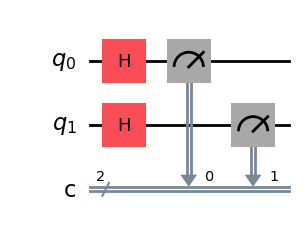

In [9]:
q = QuantumRegister(2, name='q')
c = ClassicalRegister(2, name='c')
qc = QuantumCircuit(q, c,name='qc')

qc.h(q[0])
qc.h(q[1])
qc.measure(q,c)

print(qc)
qc.draw(output='mpl')